In [1]:
import pandas as pd
import glob
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

r/daytrading
Number of Posts: 1494
Average Tickers: 2.6171352074966534
Average Words: 192.94042838018743
r/dividends
Number of Posts: 772
Average Tickers: 1.7512953367875648
Average Words: 159.97150259067357
r/economy
Number of Posts: 208
Average Tickers: 1.2163461538461537
Average Words: 321.08653846153845
r/investing
Number of Posts: 10948
Average Tickers: 1.4407197661673365
Average Words: 192.38253562294483
r/options
Number of Posts: 5063
Average Tickers: 2.1248271775627097
Average Words: 180.25103693462373
r/securityanalysis
Number of Posts: 824
Average Tickers: 1.6007281553398058
Average Words: 401.04611650485435
r/stockmarket
Number of Posts: 3937
Average Tickers: 3.923799847599695
Average Words: 464.9446278892558
r/stocks
Number of Posts: 17075
Average Tickers: 1.9510980966325036
Average Words: 192.48732064421668


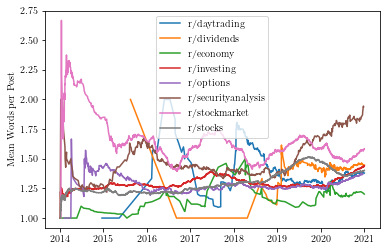

In [9]:
path = r'../data' # use your path
all_files = glob.glob(path + "/*_submission.jsonl")

for filename in all_files:
    df = pd.read_json(filename,lines=True)
    df['tickerCnt'] = df['tickers'].apply(lambda x: len(x))
    df['time'] = df['created_utc'].apply(lambda x: datetime.utcfromtimestamp(x))
    df['words'] = df['text'].apply(lambda x: len(x.split(' ')))
#     print(df['tickerCnt'].idxmax())
#     print(df.iloc[df['tickerCnt'].idxmax()])
    timedf = df[['time', 'tickerCnt', 'words']]
    timedf.index = pd.DatetimeIndex(timedf["time"])
    timedf = timedf.sort_index()
#     plt.plot(timedf[['time', 'words']].rolling('365D', on='time').mean(), label=f'r/{filename[len(path) + 1: -17]}')
    plt.plot(timedf[['time', 'tickerCnt']].loc[timedf['tickerCnt'] < 6].rolling('365D', on='time').mean(), label=f'r/{filename[len(path) + 1: -17]}')
    plt.legend()
    print('r/' + filename[len(path) + 1: -17])
    print(f'Number of Posts: {len(df)}')
    print(f'Average Tickers: {timedf["tickerCnt"].mean()}')
    print(f'Average Words: {timedf["words"].mean()}')
    plt.ylabel("Mean Words per Post")
plt.savefig('avgticks.pgf')

In [54]:
path = r'../data' # use your path
all_files = glob.glob(path + "/*_comments.jsonl")

for filename in all_files:
    df = pd.read_json(filename,lines=True)
    print('r/' + filename[len(path) + 1: -len('_comments.jsonl')])
    print(f'Number of Comments: {len(df)}')

r/daytrading
Number of Comments: 3559
r/dividends
Number of Comments: 3007
r/economy
Number of Comments: 166
r/investing
Number of Comments: 50226
r/options
Number of Comments: 19332
r/securityanalysis
Number of Comments: 2959
r/stockmarket
Number of Comments: 11980
r/stocks
Number of Comments: 78862


In [69]:
path = r'../data' # use your path
all_files = glob.glob(path + "/*.jsonl")

tickCnt = Counter()

for filename in all_files:
    df = pd.read_json(filename,lines=True)
    if len(df['tickers']) > 0:
        for x in df['tickers']:
            for y, z in x:
                tickCnt[y] += z
        
print(tickCnt.most_common(100))

[('LIVE', 7498), ('TSLA', 5723), ('AMD', 5415), ('AAPL', 4101), ('AMZN', 3759), ('LINK', 3540), ('MSFT', 2966), ('ET', 2943), ('GOOG', 2465), ('GE', 2390), ('TD', 2356), ('FB', 2262), ('NIO', 2220), ('RSI', 2216), ('NVDA', 1989), ('BABA', 1726), ('NFLX', 1493), ('X', 1456), ('AI', 1268), ('DIS', 1214), ('GM', 1116), ('T', 1106), ('B', 1098), ('PLTR', 1082), ('SQ', 1019), ('BA', 1019), ('INTC', 998), ('IBM', 974), ('V', 960), ('C', 924), ('TV', 873), ('TA', 815), ('F', 803), ('MU', 787), ('TWTR', 783), ('WMT', 723), ('NEXT', 721), ('JPM', 693), ('ATVI', 688), ('DCF', 684), ('SHOP', 668), ('NKLA', 657), ('BAC', 646), ('CVS', 630), ('DKNG', 613), ('KO', 608), ('NET', 590), ('FCF', 586), ('LPL', 582), ('XOM', 576), ('SNAP', 574), ('EA', 567), ('JNJ', 555), ('MGM', 549), ('MA', 540), ('SPCE', 540), ('DTE', 539), ('JD', 519), ('DAL', 507), ('JP', 506), ('GME', 504), ('AMC', 502), ('AAL', 481), ('GOOGL', 470), ('LEAP', 467), ('MSCI', 464), ('TDA', 450), ('MAX', 435), ('PEG', 429), ('GILD', 42

In [72]:
path = r'../data' # use your path
all_files = glob.glob(path + "/*.jsonl")

tickCnt2 = Counter()

for filename in all_files:
    df = pd.read_json(filename,lines=True)
    for x in df['tickers']:
        if len(x) > 0:
            y, z = x[0]
            tickCnt2[y] += 1
        
print(tickCnt2.most_common(100))

[('TSLA', 3382), ('AMD', 2875), ('AAPL', 2140), ('AMZN', 1981), ('MSFT', 1670), ('TD', 1597), ('GOOG', 1543), ('NIO', 1299), ('GE', 1281), ('FB', 1178), ('BABA', 1048), ('NVDA', 956), ('X', 820), ('PLTR', 733), ('NFLX', 732), ('AI', 650), ('DIS', 642), ('SQ', 607), ('T', 604), ('RSI', 568), ('LIVE', 537), ('BA', 525), ('GM', 510), ('B', 485), ('MU', 477), ('F', 470), ('V', 453), ('IBM', 451), ('TWTR', 433), ('TV', 419), ('NKLA', 403), ('ATVI', 401), ('INTC', 388), ('SHOP', 376), ('DCF', 372), ('DKNG', 367), ('TA', 366), ('JPM', 359), ('SPCE', 357), ('ET', 355), ('NET', 354), ('MGM', 347), ('SNAP', 335), ('XOM', 314), ('DTE', 307), ('KO', 304), ('WMT', 301), ('C', 296), ('TDA', 295), ('EA', 290), ('BAC', 284), ('DOW', 282), ('JP', 273), ('GME', 272), ('AMC', 268), ('CD', 265), ('JNJ', 265), ('API', 262), ('JD', 258), ('CCL', 252), ('IQ', 251), ('BYND', 251), ('CVS', 249), ('FCF', 246), ('AAL', 244), ('DAL', 242), ('RTX', 241), ('O', 237), ('SE', 235), ('MAX', 228), ('MA', 224), ('MSCI',